In [9]:
import pandas as pd
import numpy as np
import matplotlib as plt
np.set_printoptions(threshold=np.inf)

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/gmbt18/CS176-Project/cedric-preproc/Exasens.csv").iloc[2:, [0, 6, 7, 8]]

# print(df.info())
# print(df.to_string())

df.dropna(inplace=True)
df = df.astype({"Diagnosis":"category","Gender":"int64", "Age":"int64", "Smoking":"int64"}).astype({"Gender":"category","Smoking":"category"})
df = pd.get_dummies(df, columns=["Diagnosis"])
df = df.drop(["Diagnosis_Asthma", "Diagnosis_HC", "Diagnosis_Infected"], axis=1)

# Rearrange columns
cols = df.columns.tolist()
cols = cols[3:] + cols[0:3]
df = df[cols]

# print(df.info())
# print(df.to_string())

df["Age"] = pd.cut(df["Age"], bins=[0, 40, 60, 100], include_lowest=True, labels=["Young", "Middle-aged", "Old"])


# from sklearn.utils import shuffle 
# df = shuffle(df)

#print(df.info())
# print(df.to_string())


In [ ]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:,1:].values
y = df.iloc[:,0].values


le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])

X



# age_encoded = pd.Series(le.fit_transform(data["Age"]).tolist())
# diagnosis_encoded = pd.Series(le.fit_transform(data["Diagnosis"]).tolist())
# gender_encoded = pd.Series(le.fit_transform(data["Gender"]).tolist())
# smoking_encoded = pd.Series(le.fit_transform(data["Smoking"]).tolist())

# features = []
# for i in range(0, len(data.index)):
#    tmparr = []
#    tmparr.extend([age_encoded[i], gender_encoded[i], smoking_encoded[i]])
#    features.append(tmparr)

# print(features)


array([[1, 1, 2],
       [0, 1, 2],
       [1, 1, 3],
       [1, 1, 2],
       [0, 1, 2],
       [1, 0, 2],
       [1, 1, 2],
       [1, 1, 2],
       [1, 1, 2],
       [1, 1, 2],
       [1, 1, 2],
       [1, 1, 2],
       [0, 0, 2],
       [1, 1, 2],
       [0, 1, 2],
       [1, 0, 2],
       [1, 1, 2],
       [1, 1, 2],
       [1, 1, 2],
       [1, 1, 2],
       [1, 1, 2],
       [1, 1, 2],
       [1, 1, 2],
       [1, 1, 2],
       [1, 1, 2],
       [0, 1, 2],
       [0, 0, 2],
       [1, 1, 2],
       [1, 1, 3],
       [1, 1, 1],
       [1, 1, 2],
       [1, 1, 1],
       [1, 1, 2],
       [1, 1, 2],
       [0, 1, 1],
       [1, 1, 2],
       [0, 1, 2],
       [1, 1, 2],
       [0, 1, 1],
       [1, 1, 2],
       [1, 1, 2],
       [1, 1, 2],
       [0, 1, 2],
       [1, 1, 2],
       [0, 0, 2],
       [1, 1, 2],
       [1, 1, 2],
       [1, 1, 2],
       [1, 1, 2],
       [0, 1, 1],
       [1, 1, 2],
       [1, 2, 3],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [1,

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# features=zip(gender_encoded, age_encoded, smoking_encoded)

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

# model.fit(features, diagnosis_encoded)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# predict = model.predict([[0, 1, 2]]) # From [Age, Gender, Smoking], predict Diagnosis
# Age = [0 = Young (X<40), 1 = Middle Aged (40<X<60), 2 = Old (X>60)]
# Gender = [0 = Female, 1 = Male]
# Smoking = [0 = Non-smoker, 1 = Ex-smoker, 2 = Active smoker]
# print(f"Predicted Value: {predict}")
# Diagnosis = [0 = Asthma, 1 = COPD, 2 = HC, 3 = Infected]



In [ ]:
y_pred
print(pd.DataFrame(y_pred, columns=["y_pred"]).to_string())

    y_pred
0        0
1        0
2        0
3        0
4        0
5        1
6        0
7        0
8        0
9        0
10       1
11       0
12       0
13       0
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       1
26       1
27       0
28       1
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       1
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       1
58       0
59       1
60       0
61       0
62       0
63       0
64       0
65       0
66       0
67       0
68       0
69       0
70       1
71       0
72       0
73       1
74       0
75       0
76       0
77       1
78       0
79       0


In [ ]:
y_test
print(pd.DataFrame(y_test, columns=["y_test"]).to_string())

    y_test
0        0
1        0
2        0
3        0
4        0
5        1
6        0
7        0
8        0
9        0
10       1
11       0
12       0
13       0
14       1
15       1
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       1
28       0
29       0
30       0
31       0
32       0
33       0
34       1
35       1
36       0
37       0
38       0
39       0
40       0
41       0
42       1
43       1
44       0
45       1
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       1
57       1
58       1
59       1
60       1
61       0
62       1
63       0
64       0
65       0
66       0
67       1
68       0
69       0
70       1
71       0
72       1
73       1
74       0
75       1
76       0
77       0
78       0
79       0


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

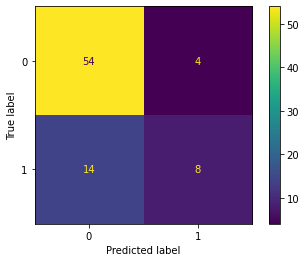

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [ ]:
ac

0.775

In [ ]:
# print(diagnosis_encoded.to_string())
# print(df.to_string())
print(f"Prediction: {model.predict([[1, 2, 3]])}")
print(cols)

Prediction: [0]
['Diagnosis_COPD', 'Gender', 'Age', 'Smoking']


In [ ]:
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp) 
sensitivity = tp / (tp+fn)
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")

Specificity: 0.9310344827586207
Sensitivity: 0.36363636363636365
